In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.6.0'

In [25]:
class_names = ['circle', 'square', 'star', 'triangle']

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = 'shapes/'
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split=0.2,
                             rotation_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

#Load data in from directories and turn it into batches
train_data = datagen.flow_from_directory(data_dir,
                                        target_size=(200, 200),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='training')
test_data = datagen.flow_from_directory(data_dir,
                                             target_size=(200, 200),
                                             batch_size=32,
                                             class_mode='categorical',
                                             subset='validation')

Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


In [27]:
#Create a model (AlexNet)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, 11, strides=4, activation='relu', padding='same', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(3, strides=2),
    tf.keras.layers.Conv2D(256, 5, strides=4, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(3, strides=2),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 256)         614656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 384)         885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 384)         1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 256)        

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [31]:
history = model.fit(test_data,
                    epochs=5,
                    steps_per_epoch=len(test_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)))

Epoch 1/5
94/94 [==============================] - 40s 425ms/step - loss: 0.1506 - accuracy: 0.9532 - val_loss: 0.2908 - val_accuracy: 0.8764
Epoch 2/5
94/94 [==============================] - 39s 411ms/step - loss: 0.1053 - accuracy: 0.9666 - val_loss: 0.0932 - val_accuracy: 0.9660
Epoch 3/5
94/94 [==============================] - 40s 422ms/step - loss: 0.1019 - accuracy: 0.9663 - val_loss: 0.0554 - val_accuracy: 0.9851
Epoch 4/5
94/94 [==============================] - 40s 424ms/step - loss: 0.0596 - accuracy: 0.9846 - val_loss: 0.0242 - val_accuracy: 0.9959
Epoch 5/5
94/94 [==============================] - 40s 425ms/step - loss: 0.0419 - accuracy: 0.9860 - val_loss: 0.0164 - val_accuracy: 0.9932


In [32]:
model.evaluate(test_data)

94/94 [==============================] - 23s 244ms/step - loss: 0.0203 - accuracy: 0.9927


[0.020273853093385696, 0.9926519989967346]

In [33]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation metrics.
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))#how many epochss did we run for?

  #Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


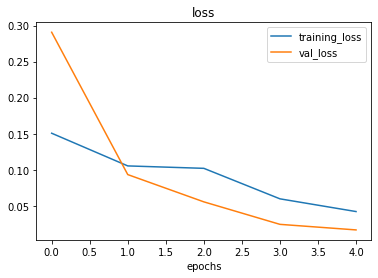

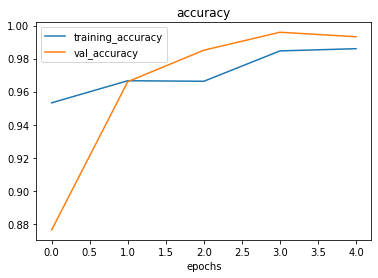

In [34]:
plot_loss_curves(history)

In [35]:
def load_and_prep_image(filename, img_shape=200):
  '''
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  '''
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values between 0&1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  '''
  Imports an image located at filename, makes a prediction with model and plot th eimage with the predicted class as the title.
  '''
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #Get the predicted class
  pred_class = class_names[int(tf.keras.backend.eval(tf.math.argmax(input = tf.squeeze(pred))))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

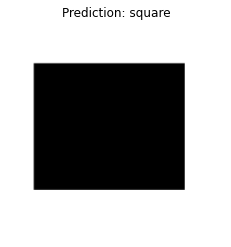

In [36]:
pred_and_plot(model, 'test_1.png', class_names=class_names)

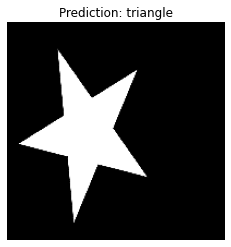

In [37]:
pred_and_plot(model, 'test_2.png', class_names=class_names)

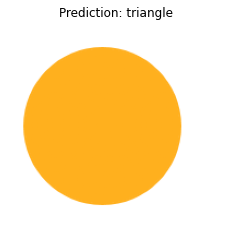

In [38]:
pred_and_plot(model, 'test_3.png', class_names=class_names)

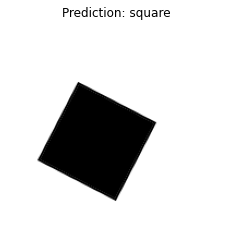

In [39]:
pred_and_plot(model, 'test_4.png', class_names=class_names)

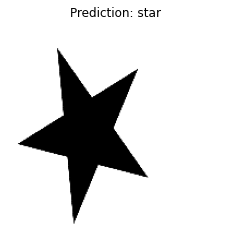

In [40]:
pred_and_plot(model, 'test_5.png', class_names=class_names)

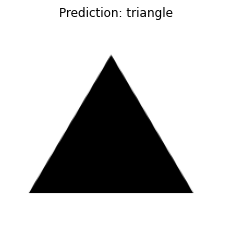

In [41]:
pred_and_plot(model, 'test_6.png', class_names=class_names)

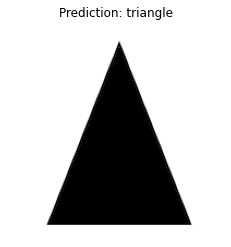

In [42]:
pred_and_plot(model, 'test_7.png', class_names=class_names)

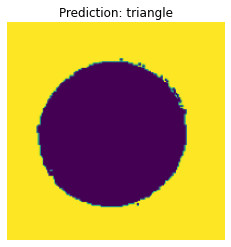

In [43]:
pred_and_plot(model, 'test_8.png', class_names=class_names)

In [45]:
model.save('AlexNet.h5')